# Exploratory data analysis

In [1]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pkg import utils
from pkg import data_vis

In [2]:
# Importing data

parent = 'data'
filename = 'cleaned.csv'

path = utils.get_path(parent, filename)

df = pd.read_csv(path, index_col=0)
df.head()

,dominance_simpson,12DICHLORETHDEG-PWY,AEROBACTINSYN-PWY,ALLANTOINDEG-PWY,CRNFORCAT-PWY,DENITRIFICATION-PWY,DHGLUCONATE-PYR-CAT-PWY,DTDPRHAMSYN-PWY,METH-ACETATE-PWY,P108-PWY,...,RH_temporal_beta_t1,LH_temporal_beta_t1,b04_t1,renda_familiar_total_t0,a08_t1,elegib2_t0,c12f_t1,EBF_3m,delivery_mode,chaos_tot_t1
id_estudo,,,,,,,,,,,,,,,,,,,,,
554,0.443833,0.0,0.00000,0.0,0.000000,0.000000,0.0,725.653108,0.000000,1010.574317,...,1.564735,2.205409,1.0,9.903538,1.0,34.9,0,1,3,1.0
555,0.333485,0.0,171.19629,0.0,0.000000,0.000000,0.0,3496.644602,0.000000,555.168412,...,1.604739,2.097656,1.0,7.178545,1.0,29.9,0,1,1,2.0
556,0.217769,0.0,0.00000,0.0,0.000000,0.000000,0.0,5669.523773,0.000000,0.000000,...,3.938755,2.194549,2.0,6.699500,2.0,33.8,0,1,1,9.0
558,0.333825,0.0,0.00000,0.0,0.000000,18.069599,0.0,1279.368652,0.000000,80.721197,...,3.240081,6.048650,1.0,10.043336,1.0,30.2,0,0,1,9.0
560,0.319998,0.0,0.00000,0.0,15.908292,0.000000,0.0,1191.508223,48.658289,0.000000,...,2.039465,2.974872,2.0,7.824446,1.0,35.0,0,0,3,2.0


In [3]:
y = df.iloc[:,-1]
X = df.iloc[:,:-1]

In [4]:
# Check correlation

correlations = []

for column in X.columns:
    corr = float(X[column].corr(y))
    correlations.append([column,corr])

In [5]:
# Adjusted limiar for only 6 features

limiar = 0.1

most_corr = []

for category in correlations:
    if category[1] > limiar or category[1] < -limiar:
        most_corr.append(category[0])

most_corr = most_corr[:6]

# print(X[most_correlated])

df_corr = pd.concat([y, X[most_corr]], axis=1)

df_corr.head()

,chaos_tot_t1,DHGLUCONATE-PYR-CAT-PWY,METH-ACETATE-PWY,PWY-5104,PWY-6470,PWY-6471,PWY-6562
id_estudo,,,,,,,
7,4.0,0.0,0.0,86.275793,0.000000,0.0,0.0
8,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0
14,2.0,0.0,0.0,646.503961,1627.303219,0.0,0.0
24,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
26,7.0,0.0,0.0,0.000000,0.000000,0.0,0.0


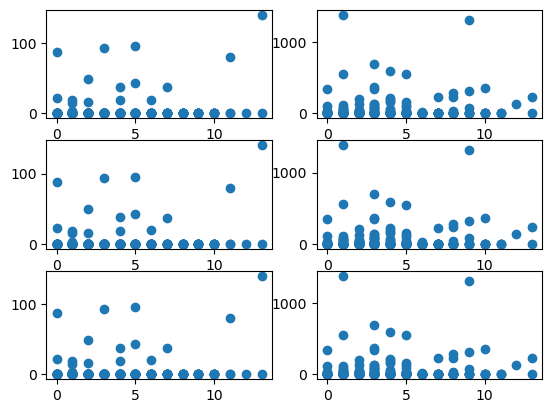

In [6]:
fig, axes = plt.subplots(3,2)

y = df_corr.iloc[:,0]

for row in range(3):
    for column in range(2):
        x_i = df_corr.iloc[:,column+1]
        axes[row, column].scatter(y, x_i)

plt.show()